In [97]:
# importer les packages
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
# pour la visualisation
import seaborn as sns
# pour génerer le model pour le deploiyer sur l'appplication
import pickle


In [17]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [18]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000000,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000000,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.000000,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.000000,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.000000,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.000000,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.000000,349.0,360.0,1.0,Semiurban,N


In [20]:
pd.set_option('display.max_rows',10)

In [21]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# voir les valeurs manquantes

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [28]:
df.isnull().sum().sort_values(ascending=False)

Credit_History       50
Self_Employed        32
LoanAmount           22
Dependents           15
Loan_Amount_Term     14
                     ..
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
Education             0
Loan_ID               0
Length: 13, dtype: int64

# voir les valeurs anormales

In [29]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [30]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002004,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [31]:
df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
                     ...   
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
Length: 13, dtype: object

# Séparer les variables numériques avec les variables catégoriques

In [60]:
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes) :
    if c== object:
        cat_data.append(df.iloc[:,i])
    else:
        num_data.append(df.iloc[:,i])
        

        
cat_data=pd.DataFrame(cat_data)
num_data=pd.DataFrame(num_data)

cat_data=pd.DataFrame(cat_data.transpose())
num_data=pd.DataFrame(num_data.transpose())
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,Urban,Y
4,LP001008,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,Urban,Y


# pour les variables catoriques on va remplacer les valeurs manquantes par les valeurs les plus fréquentes

In [61]:
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))

In [62]:
cat_data.isnull().sum().any()

False

# pour les variables numériques on va remplacer les valeurs manquantes par le valeur précendente de la meme colonne

In [63]:
num_data.fillna(method= 'bfill', inplace=True)
num_data.isnull().sum().any()

False

In [64]:
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


# Remplacer les valeurs catégoriques par les valeurs numériques 0,1

In [65]:
target_values={"Y":1,"N":0}
target= cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target =target.map(target_values)
target

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [66]:
le=LabelEncoder()
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [67]:
# supprimer Loan_ID
cat_data.drop('Loan_ID',axis=1,inplace= True)

# Concatener les variables numériques et les variables catégoriques

In [68]:
x= pd.concat([cat_data,num_data],axis=1)
y=target

In [69]:
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


le pourcentage des crédits accordés est: 0.3127035830618892
le pourcentage des crédits non accordés est: 0.6872964169381107


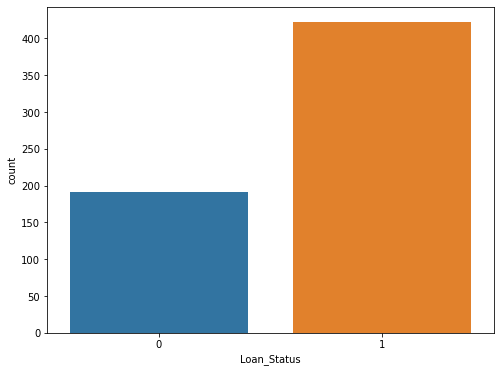

In [73]:
plt.figure(figsize=(8,6))
sns.countplot(y)
yes=target.value_counts()[0]/len(y)
no=target.value_counts()[1]/len(y)
print(f'le pourcentage des crédits accordés est: {yes}')
print(f'le pourcentage des crédits non accordés est: {no}')

In [74]:
df= pd.concat([x,y],axis=1)

In [75]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


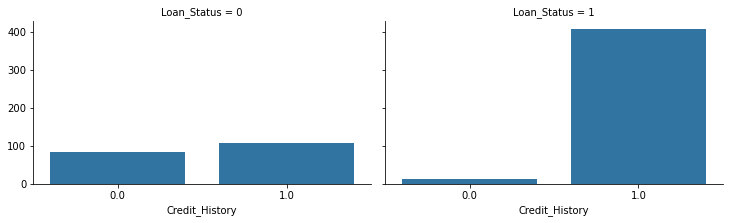

In [78]:
# Credit history
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Credit_History')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


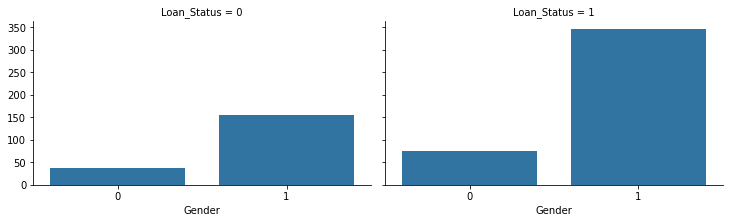

In [79]:
# Credit history
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Gender')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


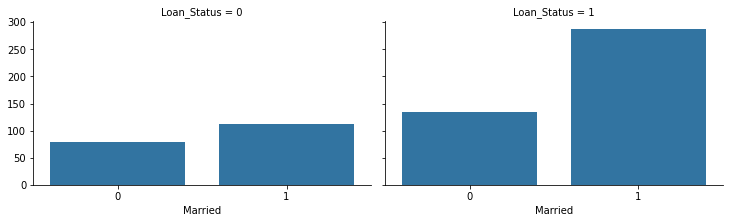

In [80]:
# Credit history
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Married')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:645: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


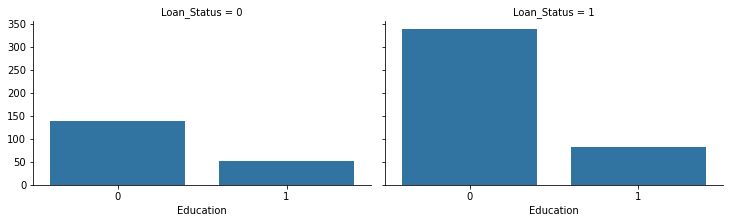

In [81]:
# Credit history
grid=sns.FacetGrid(df,col='Loan_Status',size=3.2,aspect=1.6)
grid.map(sns.countplot,'Education')

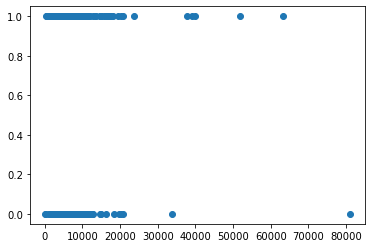

In [86]:
#revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

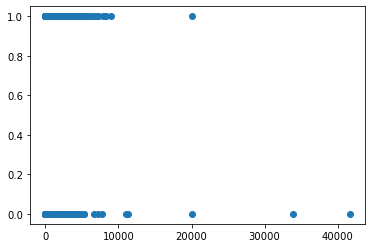

In [87]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [88]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1,1,0,0,0,1,3833.5,268.0,132.5,360.0,1.0
1,1,1,0,0,0,1,3812.5,1239.5,127.5,360.0,1.0


# diviser la base de données en une base de donnée test et d'entrainement

In [91]:
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train,test in sss.split(x,y):
    x_train,x_test= x.iloc[train],x.iloc[test]
    y_train,y_test= y.iloc[train],y.iloc[test]

print('x_train taille:' , x_train.shape)
print('x_test taille:' , x_test.shape)
print('y_train taille:' , y_train.shape)
print('y_test taille:' , y_test.shape)

x_train taille: (491, 11)
x_test taille: (123, 11)
y_train taille: (491,)
y_test taille: (123,)


# Application des algorithmes Logistic regression, KNN et DecisionTree

In [101]:
models={'LogisticRegression': LogisticRegression(random_state=42),
       'KNeighborsClassifier': KNeighborsClassifier(),
       'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
       }
# La fonction de precision 
def accu(y_true,y_pred,retu=False):
    acc=accuracy_score(y_true,y_pred)
    if retu:
        return acc
    else:
        print(f'la precision du modele est: {acc}')
#la fonction d'application des modeles
def train_test_eval(models,x_train,y_train,x_test,y_test):
    for name,model in models.items() :
        print(name,':')
        model.fit(x_train,y_train)
        accu(y_test,model.predict(x_test))
        print('-'*30)

train_test_eval(models,x_train,y_train,x_test,y_test)

LogisticRegression :
la precision du modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


:
la precision du modele est: 0.6504065040650406
------------------------------
DecisionTreeClassifier :
la precision du modele est: 0.8455284552845529
------------------------------


# Nouvelle base de données avec les variables les plus importantes

In [106]:
x_2=x[['Credit_History','Married','CoapplicantIncome']]

In [107]:
sss= StratifiedShuffleSplit(n_splits=1, test_size=0.2,random_state=42)
for train,test in sss.split(x_2,y):
    x_train,x_test= x_2.iloc[train],x_2.iloc[test]
    y_train,y_test= y.iloc[train],y.iloc[test]

print('x_train taille:' , x_train.shape)
print('x_test taille:' , x_test.shape)
print('y_train taille:' , y_train.shape)
print('y_test taille:' , y_test.shape)

x_train taille: (491, 3)
x_test taille: (123, 3)
y_train taille: (491,)
y_test taille: (123,)


In [108]:
train_test_eval(models,x_train,y_train,x_test,y_test)

LogisticRegression :
la precision du modele est: 0.8536585365853658
------------------------------
KNeighborsClassifier :
la precision du modele est: 0.6991869918699187
------------------------------
DecisionTreeClassifier :
la precision du modele est: 0.8455284552845529
------------------------------


# Application de la regression logistique sur notre base de données

In [109]:
Classifier=LogisticRegression()
Classifier.fit(x_2,y)

LogisticRegression()

In [110]:
# Enregistrement de notre modèle
pickle.dump(Classifier,open('model.pkl','wb'))